# Exercise 6: The importance of a priori knowledge

In the preceding exercises we have illustrated some explorations/pre-processings/analyses that a data scientist may conduct when accessing data of a clinical data warehouse. We have shown that various expertises should be leveraged to obtain a meaningful result. For instance, medical expertise was necessary in exercise 4 to obtain dictionaries of synonyms that may be searched in clinical notes by a NLP algorithm and in exercise 3 an expertise of the clinical information system was necessary to properly account for data temporality.

In this short exercise, we provide some additional examples of **a priori knowledge provided by clinicians or IT experts** that should be included in an analysis on real world data. 

We initialize the notebook by importing the following libraries:

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import datetime
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [2]:
import sys

sys.path.append("../")

from viz import plot_primary_kaplan, plot_secondary_kaplan


# 1. Dataset

Open the following files using the `pandas.read_pickle()` function : 
  - *data/df_person.pkl* as `df_person`
  - *data/df_visit.pkl* as `df_visit`
  - *data/df_condition.pkl* as `df_cond`
  - *data/df_med.pkl* as `df_med`
  - *data/df_bio.pkl* as `df_bio.pkl`

In [3]:
# Patients
df_person = pd.read_pickle('data/df_person.pkl')
# Visits
df_visit = pd.read_pickle('data/df_visit.pkl')
# Diagnosis (condition)
df_condition = pd.read_pickle('data/df_condition.pkl')
# Medication
df_med = pd.read_pickle('data/df_med.pkl')

# 2. Exploration and pre-processing of the dataset

We consider hereafter a priori knowledge coming either from clinicians or from the IT department of a hospital.

## 2.1 Leveraging a priori knowledge of clinical biases

As underlined in the problem setting, our statistical analysis relies on the strong assumption that patients are randomly allocated to either cohort A, cohort B or control cohort. Let's assume that a clinician knowing the actual working of a medical service informs us of the fact that this assumption is flawed in the case of a specific hospital "Clinique L.Pasteur". in this hospital, clinicians decided to provide drug A to high risk patients, and drug B or no drug to other patients. Consequently, patients having received drug B may feature a survival curve much better than patients having received drug A, but this may not indicate that drug A is worse than drug B, it is a simple artefact of patients' allocation... 

Let's correct the analysis by not considering patients treated in hospital "Clinique L.Pasteur".


In [4]:
df_visit_fix = #TODO

## 2.2 Leveraging a priori knowledge of IT-caused biases

Let's assume that an expert of the IT department indicates that the death of patients was not collected for hospital "GHU A.Fleming" between June and August 2023 due to an IT problem. This bug may greatly impact the study's result as patients would spuriously appear to have survived.

Let's correct the analysis by not considering patients treated in GHU A.Fleming between June and August 2024.

In [5]:
min_date = #TODO
max_date = #TODO
df_visit_fix = #TODO

# 3. Statistical analysis

Now that we have pre-processed raw data to correct flawed or missing values, we can conduct the statistical analysis. We plot the Kaplan-Meier estimates of survival curves, and realize the log-rank tests. 

**Primary objective: are the drugs efficient on the total population?**

In [6]:
t_end_of_study = #TODO

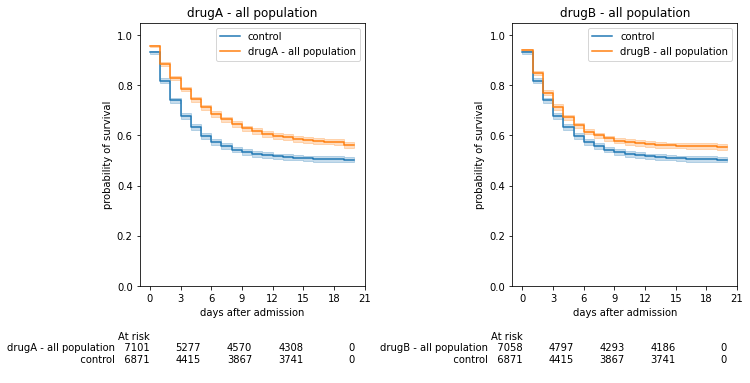

In [7]:
plot_primary_kaplan(#TODO)

Our analysis confirms the result of exercise 1.

**Secondary objective: sub-population analysis**

To reach our secondary objective, we now conduct the same statistical analysis on sub-populations that correspond to different sexes and ages to obtain a better insight on drugs efficiencies.

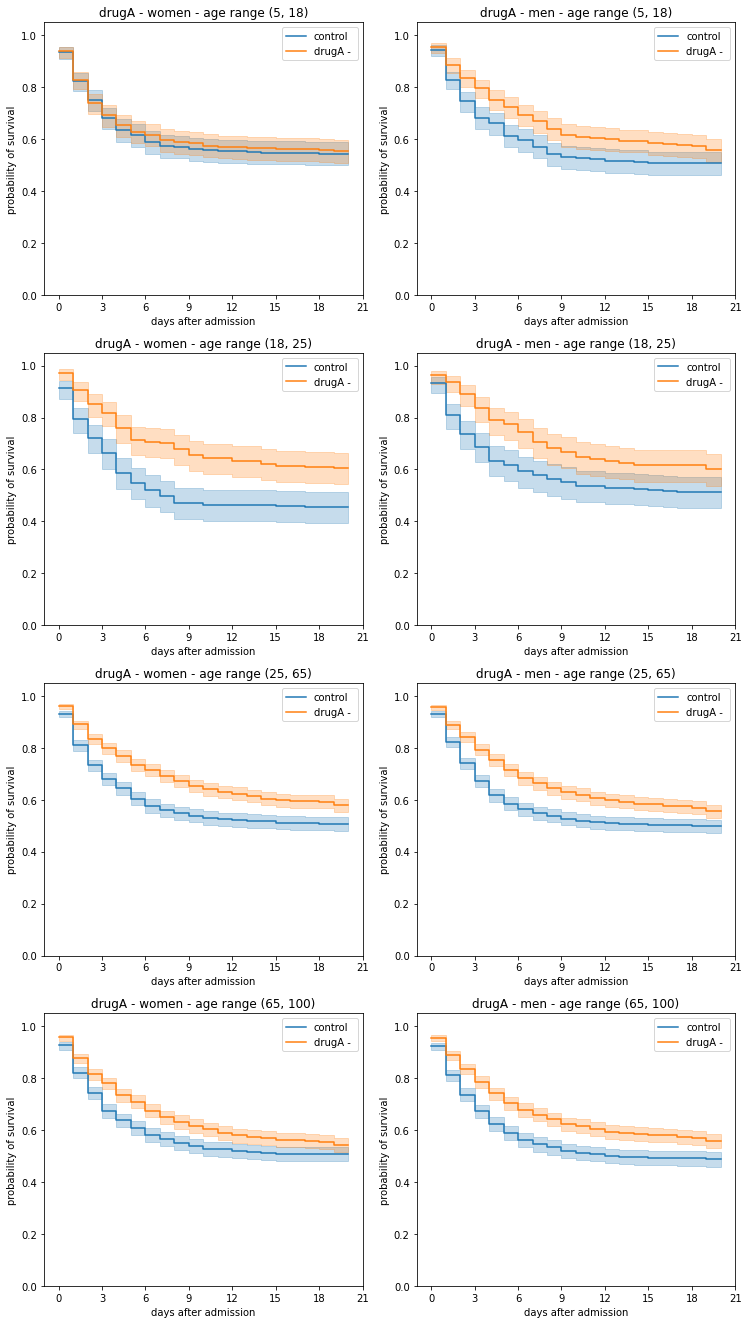

In [8]:
plot_secondary_kaplan(#TODO)

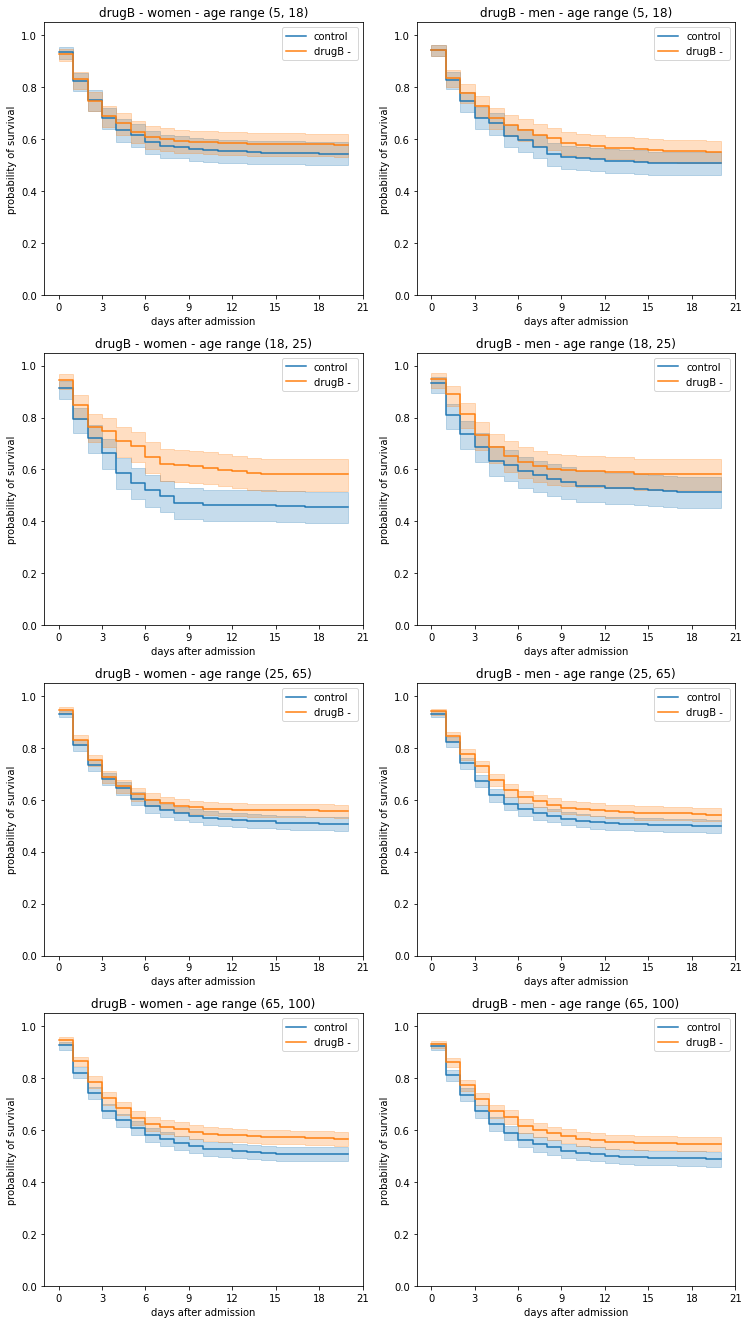

In [9]:
plot_secondary_kaplan(#TODO)

# 4. Takeaways

- A simple **exploration of data is rarely sufficient to correct for the numerous biases** that may appear throughout data collection, curation and integration pipelines. A constant discussion with data collectors and curators appears necessary to list and correct biases.
- Two expertises are specially important when studying real world data: **clinicians** that have collected data and **technical experts** that operate various devices and that manage the information system.

# 5. References

- Looten, Vincent. « What Can Millions of Laboratory Test Results Tell Us about the Temporal Aspect of Data Quality? Study of Data Spanning 17 Years in a Clinical Data Warehouse ». Computer Methods and Programs in Biomedicine, 2019, 8.
- Agniel, Denis, Isaac S Kohane, et Griffin M Weber. « Biases in Electronic Health Record Data Due to Processes within the Healthcare System: Retrospective Observational Study ». BMJ, 30 avril 2018, k1479. https://doi.org/10.1136/bmj.k1479.